# Al Charge Radius Plot

Kurtis Bartlett

2017/3/3

Ipython notebook for generating plot of extracted and theoretically predicted <sup>27</sup>Al charge radii.

In [1]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [2]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    "pgf.rcfonts": False,
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    #"font.sans-serif": "Computer Modern Sans serif",
    #"font.serif": [],      
    "font.sans-serif": [],
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import quad
from scipy.special import gamma

In [4]:
%matplotlib inline
plt.style.use('seaborn-ticks')
sns.set_palette("muted")

In [5]:
def calc_chi2(fit, data, err, dof):
    chi2 = np.sum(np.square(data-fit)/np.square(err))
    return chi2, chi2/dof

def chi2probdistribution(chi2, dof):
    if chi2 > 0:
        num = np.power(chi2,(dof-2.0)/2.0)*np.exp(-chi2/2.0)
        dem = np.power(2.0,(dof/2.0))*gamma(dof/2.0)
        return num/dem
    elif chi2 == 0:
        return 0
    else:
        print('Chi^2 values < 0 not valid!')
        
def calc_chi2prob(chi2, dof):
    return quad(chi2probdistribution, chi2, np.inf, (dof))

In [6]:
# Theoretical Calculation
theory_cal = np.array([3.013]) #[fm]
theory_cal_err = np.array([0.000]) #[fm]

# Electron Scattering Data
e_scattering_data = np.array([3.06, 3.05, 3.035]) #[fm]
#Using Springer Materials Reference.
#e_scattering_data_err = np.array([0.09, 0.05, 0.040]) #[fm]
#Using Atomic Data and Nuclear Data Tables (1987)
e_scattering_data_err = np.array([0.09, 0.05, 0.002]) #[fm]

# Muonic Atomic Data
muon_atom_data = np.array([3.062]) #[fm]
muon_atom_data_err = np.array([0.003]) #[fm]

In [7]:
measurements = np.concatenate((e_scattering_data,muon_atom_data))
measurements_err = np.concatenate((e_scattering_data_err,muon_atom_data_err))

In [8]:
# Calculate Error Weight Average
weight_factor=1/(measurements_err*measurements_err)
[ewa,sum_weights]=np.average(measurements, weights=weight_factor,returned=True)
ewa_err=np.sqrt((1/sum_weights))
# Calculate Chi^2 and degrees of freedom
chi_sq=(weight_factor*np.square(ewa*np.ones(len(measurements))-measurements)).sum()
dof=len(measurements)-1
scale_val=np.sqrt(chi_sq/dof)
scaled_err=ewa_err*scale_val
avg_text='Measurement\nAVG: {0:.3f}$\pm${1:.3f} fm'.format(ewa, scaled_err)

In [9]:
print('EWA:         {0:.3f} fm\n'.format(ewa)+
      'EWA_Err:     {0:.3f} fm\n'.format(ewa_err)+
      'Chi^2:       {0:.3f}\n'.format(chi_sq)+
      'DOF:         {0:d}\n'.format(dof)+
      'Chi^2/DOF:   {0:.3f}\n'.format(chi_sq/dof)+
      'Scale Value: {0:.3f}\n'.format(scale_val)+
      'Scaled_Err:  {0:.3f} fm'.format(scaled_err))

EWA:         3.043 fm
EWA_Err:     0.002 fm
Chi^2:       56.129
DOF:         3
Chi^2/DOF:   18.710
Scale Value: 4.325
Scaled_Err:  0.007 fm


In [10]:
# Vertical Axis Names
y_axis_position = [0.5, 1.0, 1.5, 2.0, 2.5]
y_axis_labels = ['', '', '', '','']

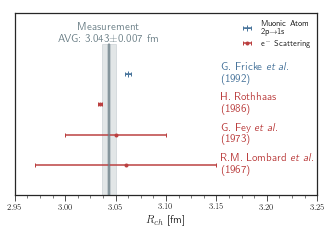

In [40]:
fig, ax = plt.subplots(figsize=figsize(0.9))
#pp.errorbar(theory_cal,
#            [2.5],
#            xerr=theory_cal_err,
#            label='FSUgold RMF',
#            ls='none',
#            marker='o',
#            color=sns.xkcd_rgb['medium green'])
ax.errorbar(muon_atom_data,
            [2.0], 
            xerr=muon_atom_data_err,
            label='Muonic Atom\n 2p$\\rightarrow$1s',
            ls='none',
            marker='+',
            capsize=2,
            capthick=1,
            color=sns.xkcd_rgb['dull blue'])
ax.errorbar(e_scattering_data,
            [0.5, 1.0, 1.5], 
            xerr=e_scattering_data_err, 
            label='e$^{-}$ Scattering', 
            ls='none', 
            marker='.',
            capsize=2,
            capthick=1,
            color=sns.xkcd_rgb['dull red'])
ax.plot([ewa,ewa],[0.0,2.5],
        #label=avg_text,
        ls='-',
        color=sns.xkcd_rgb['steel grey'])
ax.fill_between([ewa-ewa_err,ewa+ewa_err],0.0,2.5,
                color=sns.xkcd_rgb['steel grey'],
                alpha=0.2)
ax.fill_between([ewa-scaled_err,ewa+scaled_err],0.0,2.5,
                color=sns.xkcd_rgb['steel grey'],
                alpha=0.2)
ax.text(ewa,2.85,
        avg_text,
        fontsize=11,
        color=sns.xkcd_rgb['steel grey'],
        verticalalignment='top',
        horizontalalignment='center')
#ax.text(3.16, 2.5,
#        'C.J. Horowitz\n(2014)',
#        fontsize=11,
#        verticalalignment='center',
#        color=sns.xkcd_rgb['medium green'])
ax.text(3.155, 2.0, 
        'G. Fricke \\textit{et al.}\n(1992)',
        fontsize=11,
        verticalalignment='center',
        color=sns.xkcd_rgb['dull blue'])
ax.text(3.155, 1.5,
        'H. Rothhaas\n(1986)',
        fontsize=11,
        verticalalignment='center',
        color=sns.xkcd_rgb['dull red'])
ax.text(3.155, 1.0,
        'G. Fey \\textit{et al.}\n(1973)',
        fontsize=11,
        verticalalignment='center',
        color=sns.xkcd_rgb['dull red'])
ax.text(3.155, 0.5,
        'R.M. Lombard \\textit{et al.}\n(1967)',
        fontsize=11,
        verticalalignment='center',
        color=sns.xkcd_rgb['dull red'])
#pp.text(3.25, -0.5,
#        'Measurement Sources: G. Fricke, K. Heilig, Nuclear Charge Radii 13-Al Aluminum: Datasheet from Landolt-Bornstein, Springer Materials (2004)',
#        fontsize=8,
#        verticalalignment='center',
#        horizontalalignment='center')
ax.set_xlabel('$R_{ch}$ [fm]')
ax.legend(loc='upper right')
ax.tick_params(left=False)
ax.set_yticks(y_axis_position)
ax.set_yticklabels(y_axis_labels)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
#pp.xlim(2.5,3.5)
ax.set_xlim(2.95,3.25)
ax.set_ylim(0.0,3.0)
plt.savefig('al_charge_radius_plot.png', bbox_inches='tight')
plt.savefig('al_charge_radius_plot.pdf', bbox_inches='tight')
plt.savefig('al_charge_radius_plot.pgf', bbox_inches='tight')
plt.show()